# Prediction Modeling Based on District feature

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skplt
from sklearn.metrics import classification_report


In [16]:
# Read in fresh cleaned dataset
df = pd.read_csv('chicago_data_cleaned.csv')


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 15 columns):
Date                    object
ID                      int64
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(9), object(1)
memory usage: 432.0+ MB


In [18]:
df.head(3)

,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
0,2006-04-02 13:00:00,4673626,23279,12,173,66,False,False,16.0,2006,41.981913,-87.771996,4,2,13
1,2006-02-26 13:40:48,4673627,26672,10,217,75,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2,2006-01-08 23:16:00,4673628,6596,0,40,58,False,False,3.0,2006,41.769897,-87.593671,1,8,23


In [19]:
df_for_model = df.drop(['ID','District', 'Latitude', 'Longitude', 'Date'], axis=1)

labels = df['District']

In [20]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 10 columns):
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), int64(8)
memory usage: 269.0 MB


In [21]:
def evaluate_features(X, y, key=0):
    """
    General helper function for evaluating effectiveness of passed features in ML model

    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation

    Parameters
    ----------
    X : Features array

    y : Labels array

    key: 0 = DecisionTreeClassifier (Default)
         1 = ExtraTreeClassifier
         2 = RandomForestClassifier
         3 = KNeighborsClassifier
         4 = GaussianNB
    """

    clf = [DecisionTreeClassifier(),
           ExtraTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           GaussianNB()]
    
    clf_names = ['DecisionTreeClassifier',
                 'ExtraTreeClassifier',
                 'RandomForestClassifier', 
                 'KNeighborsClassifier',
                 'GaussianNB']

    probabilities = cross_val_predict(clf[key], X, y, cv=StratifiedKFold(n_splits=2, random_state=8),
                                      n_jobs=-1, method='predict_proba', verbose=2)
    predicted_indices = np.argmax(probabilities, axis=1)
    classes = np.unique(y)
    predicted = classes[predicted_indices]
    print('Log loss: {}'.format(log_loss(y, probabilities)))
    print('Accuracy: {}'.format(accuracy_score(y, predicted)))
    title = "Confusion Matrix for " + labels.name + " with " + clf_names[key]
    skplt.metrics.plot_confusion_matrix(y, predicted, normalize=True, figsize=(20,10), title=title)
    
    print(classification_report(y, predicted))
    plt.show()

## DecisionTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   50.9s finished


Log loss: 1.3575790167508908
Accuracy: 0.9606879756354831
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94    163227
         2.0       0.96      0.97      0.97    184992
         3.0       0.98      0.98      0.98    221543
         4.0       0.94      0.98      0.95    249396
         5.0       0.97      0.90      0.94    192589
         6.0       0.98      0.97      0.97    252191
         7.0       0.98      0.98      0.98    257837
         8.0       0.97      0.98      0.97    298651
         9.0       0.97      0.96      0.97    213449
        10.0       0.95      0.97      0.96    184329
        11.0       0.94      0.93      0.93    275219
        12.0       0.95      0.94      0.94    204248
        13.0       0.00      0.00      0.00         1
        14.0       0.96      0.96      0.96    161320
        15.0       0.97      0.97      0.97    191217
        16.0       0.95      0.95      0.95    142049
        17.0       0.93

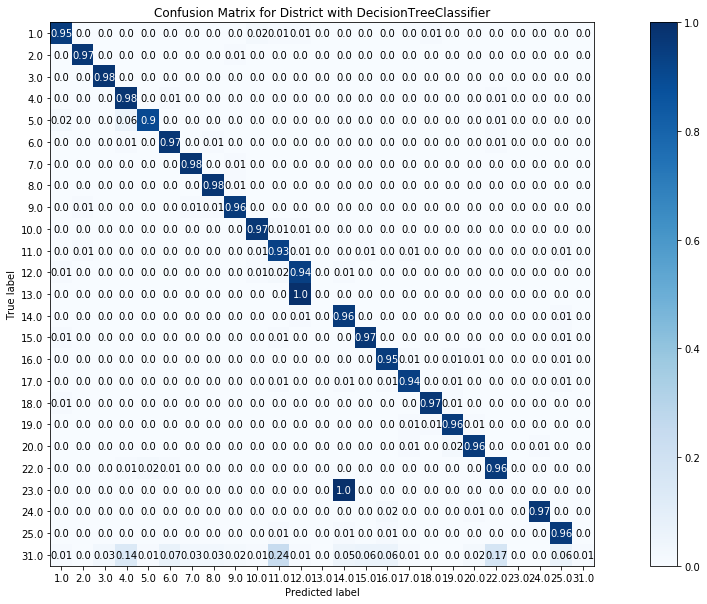

In [22]:
evaluate_features(df_for_model, labels)

## ExtraTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   23.3s finished


Log loss: 29.582025462826174
Accuracy: 0.14351263853153995
              precision    recall  f1-score   support

         1.0       0.27      0.22      0.25    163227
         2.0       0.10      0.13      0.11    184992
         3.0       0.16      0.15      0.15    221543
         4.0       0.19      0.30      0.23    249396
         5.0       0.32      0.24      0.27    192589
         6.0       0.21      0.17      0.19    252191
         7.0       0.16      0.18      0.17    257837
         8.0       0.13      0.15      0.14    298651
         9.0       0.11      0.07      0.08    213449
        10.0       0.10      0.14      0.12    184329
        11.0       0.13      0.24      0.17    275219
        12.0       0.12      0.11      0.11    204248
        13.0       0.00      0.00      0.00         1
        14.0       0.13      0.11      0.12    161320
        15.0       0.18      0.11      0.14    191217
        16.0       0.09      0.04      0.06    142049
        17.0       0.0

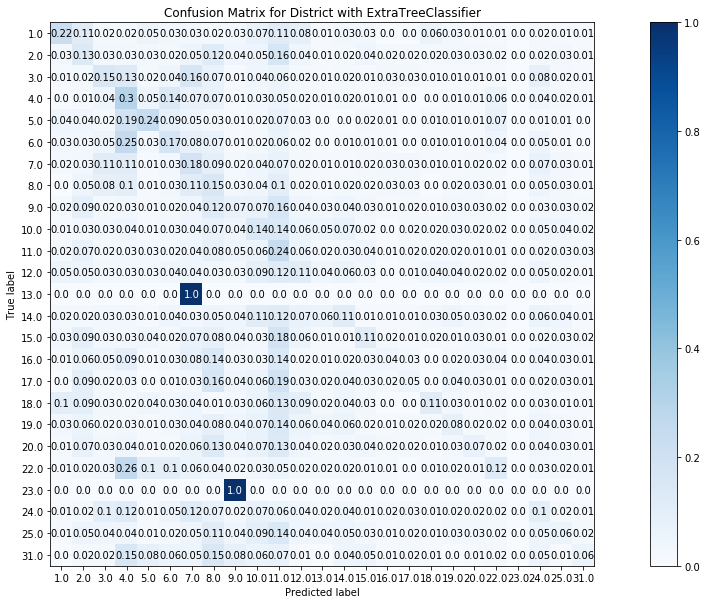

In [23]:
evaluate_features(df_for_model, labels, 1)

## RandomForestClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.6min finished


Log loss: 8.923881651659455
Accuracy: 0.12629757056790328


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.05      0.76      0.10    163227
         2.0       0.19      0.02      0.04    184992
         3.0       0.38      0.12      0.18    221543
         4.0       0.26      0.32      0.29    249396
         5.0       0.49      0.04      0.07    192589
         6.0       0.39      0.10      0.16    252191
         7.0       0.30      0.17      0.22    257837
         8.0       0.25      0.07      0.10    298651
         9.0       0.17      0.02      0.04    213449
        10.0       0.15      0.20      0.17    184329
        11.0       0.15      0.39      0.21    275219
        12.0       0.15      0.02      0.03    204248
        13.0       0.00      0.00      0.00         1
        14.0       0.22      0.01      0.02    161320
        15.0       0.41      0.06      0.10    191217
        16.0       0.20      0.08      0.11    142049
        17.0       0.14      0.01      0.02    123682
        18.0       0.30    

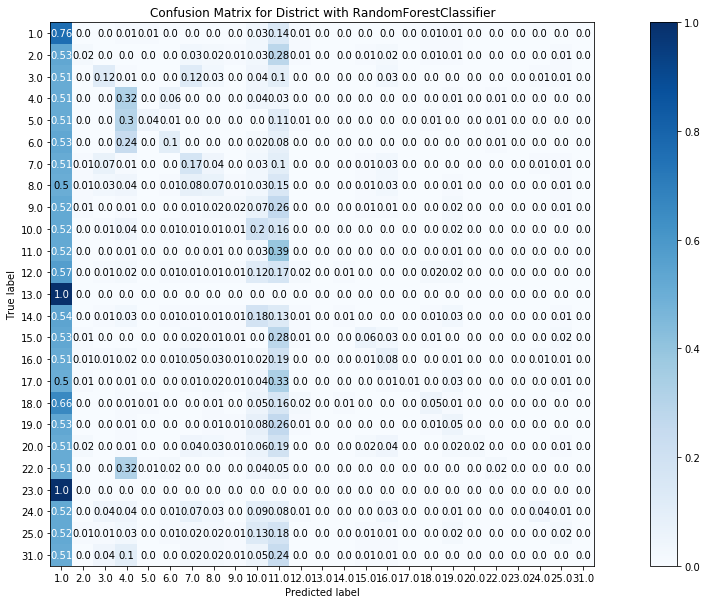

In [24]:
evaluate_features(df_for_model,labels,2)

## KNeighborsClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


Log loss: 3.576998106562848
Accuracy: 0.4641631389344642


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.08      0.84      0.15    163227
         2.0       0.70      0.48      0.57    184992
         3.0       0.71      0.51      0.59    221543
         4.0       0.69      0.45      0.54    249396
         5.0       0.85      0.69      0.76    192589
         6.0       0.75      0.52      0.61    252191
         7.0       0.66      0.42      0.51    257837
         8.0       0.74      0.41      0.53    298651
         9.0       0.73      0.46      0.56    213449
        10.0       0.78      0.61      0.69    184329
        11.0       0.67      0.49      0.57    275219
        12.0       0.57      0.33      0.42    204248
        13.0       0.00      0.00      0.00         1
        14.0       0.51      0.28      0.36    161320
        15.0       0.73      0.54      0.62    191217
        16.0       0.69      0.38      0.49    142049
        17.0       0.57      0.28      0.37    123682
        18.0       0.73    

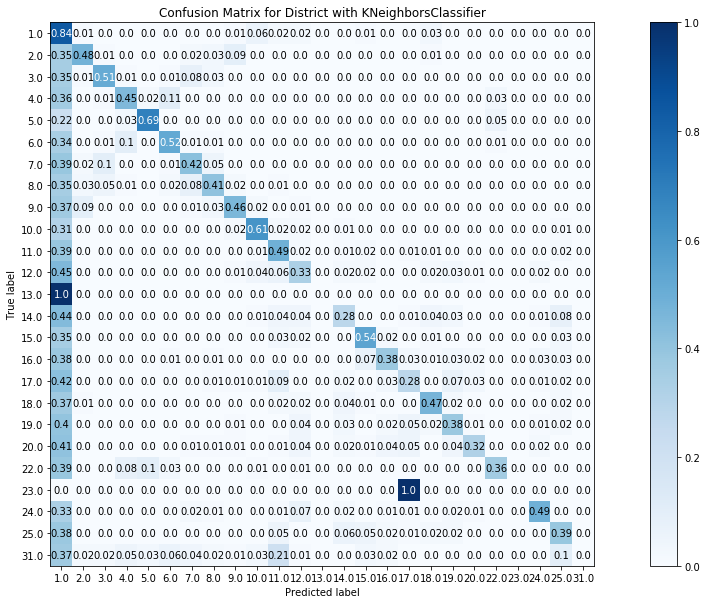

In [25]:
evaluate_features(df_for_model,labels,3)

## GaussianNB:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.2s finished


Log loss: 3.032853100932239
Accuracy: 0.0977933695793583


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.05      0.77      0.10    163227
         2.0       0.00      0.00      0.00    184992
         3.0       0.14      0.04      0.06    221543
         4.0       0.21      0.35      0.26    249396
         5.0       0.00      0.00      0.00    192589
         6.0       0.03      0.00      0.00    252191
         7.0       0.01      0.00      0.00    257837
         8.0       0.18      0.11      0.13    298651
         9.0       0.00      0.00      0.00    213449
        10.0       0.14      0.12      0.13    184329
        11.0       0.12      0.30      0.17    275219
        12.0       0.14      0.01      0.02    204248
        13.0       0.00      0.00      0.00         1
        14.0       0.22      0.01      0.02    161320
        15.0       0.38      0.00      0.00    191217
        16.0       0.07      0.05      0.06    142049
        17.0       0.17      0.06      0.08    123682
        18.0       0.16    

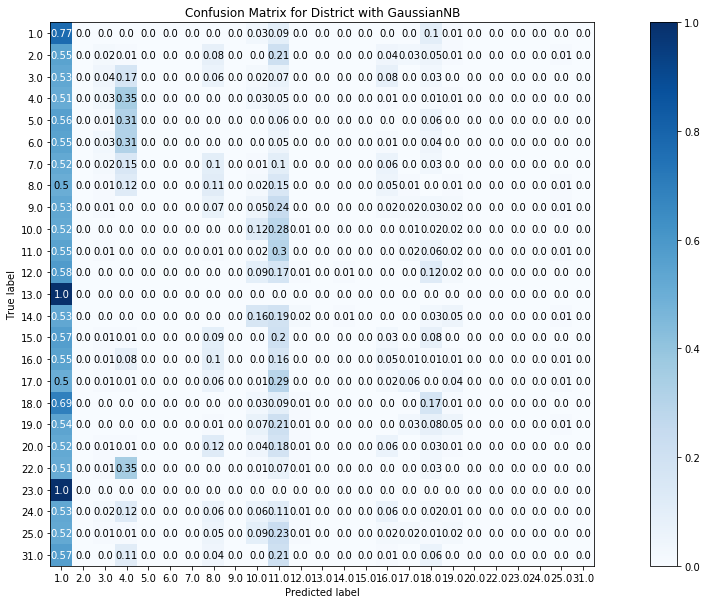

In [26]:
evaluate_features(df_for_model,labels,4)